In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
mu_a = 4
sigma_a = 0.5
mu_b = 3
sigma_b = 0.2

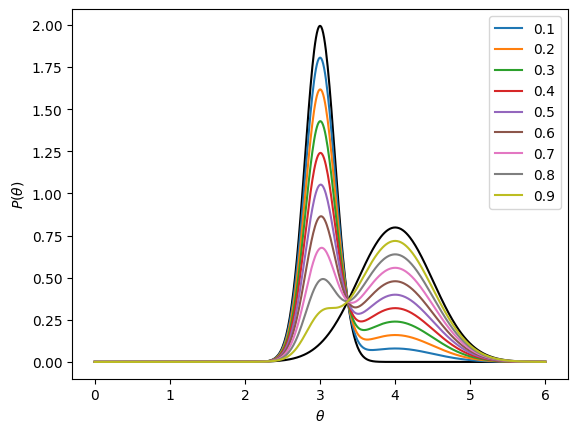

In [32]:
x = np.linspace(0,6, 500)
dista = stats.norm(mu_a, sigma_a)
distb = stats.norm(mu_b, sigma_b)
plt.plot(x, dista.pdf(x), color='k')
plt.plot(x, distb.pdf(x), color='k')

for a in range(1,10):
    alpha = a * 0.1
    plt.plot(x, alpha *dista.pdf(x) + (1 - alpha) * distb.pdf(x), label=round(alpha,2))

plt.legend()
plt.xlabel("$\\theta$")
plt.ylabel("$P(\\theta)$")

plt.show()

In [39]:
num_samples = 1000
alpha = 0.4
samples = np.zeros(num_samples)
rng = np.random.default_rng()

for i in range(num_samples):
    sample_alpha = rng.random()
    if sample_alpha < alpha:
        samples[i] = rng.normal(mu_a, sigma_a)
    else:
        samples[i] = rng.normal(mu_b, sigma_b)

In [59]:
def get_samples(alpha, num_samples = 1000):
    samples = np.zeros(num_samples)

    for i in range(num_samples):
        sample_alpha = rng.random()
        if sample_alpha < alpha:
            samples[i] = rng.normal(mu_a, sigma_a)
        else:
            samples[i] = rng.normal(mu_b, sigma_b)
    return samples

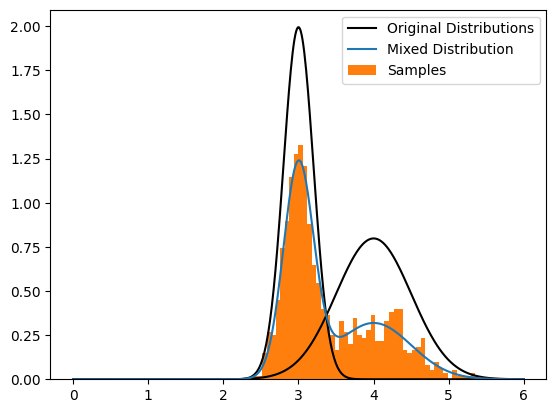

In [57]:
plt.plot(x, dista.pdf(x), color='k', label="Original Distributions")
plt.plot(x, distb.pdf(x), color='k')
plt.plot(x, alpha *dista.pdf(x) + (1 - alpha) * distb.pdf(x), label="Mixed Distribution")

plt.hist(samples, density=True, label="Samples", bins=50)
plt.legend()
plt.show()

Below is wrong...

In [300]:
# alpha_values = np.linspace(0,1, 500)
# means = np.zeros_like(alpha_values)
# bias = np.zeros_like(alpha_values)

# for i, alpha in enumerate(alpha_values):
#     samples = get_samples(alpha, num_samples = 1000)
#     means[i] = np.mean(samples)
#     bias[i] = means[i] - mu_a
    
# plt.plot(alpha_values, bias)
# plt.axhline(0, color='k', label=0)
# plt.axhline(mu_b - mu_a, color='r', label="$\\mu_b - \\mu_a$" )

# plt.xlabel("$\\alpha$")
# plt.ylabel("$ \\langle \\mu_a \\rangle - \mu_a$")
# plt.legend()
# plt.show()

# plt.plot(x, dista.pdf(x), color='k', label="Original Distributions")
# plt.plot(x, distb.pdf(x), color='k')
# for i, alpha in enumerate(alpha_values[::50]):
#     plt.axvline(means[i], label=alpha)

# plt.legend()
# plt.show()

## 2 components

Now we have to do this properly.

In [101]:
# shoutout https://www.geeksforgeeks.org/ml-expectation-maximization-algorithm/#
def log_likelihood(x, samples, alpha):
    mu1, sigma1, mu2, sigma2 = x
    first_term = alpha * stats.norm.pdf(samples, mu1, sigma1)
    second_term = (1 - alpha) * stats.norm.pdf(samples, mu2, sigma2)
    return np.sum(np.log(first_term + second_term))

In [102]:
these_samples = get_samples(alpha = 0.4, num_samples = 1000)
ll = []
for a in np.linspace(0,1):
    l = log_likelihood([mu_a, sigma_a, mu_b, sigma_b], samples = these_samples, alpha = a)
    ll.append(l)

Text(0, 0.5, 'Log likelihood')

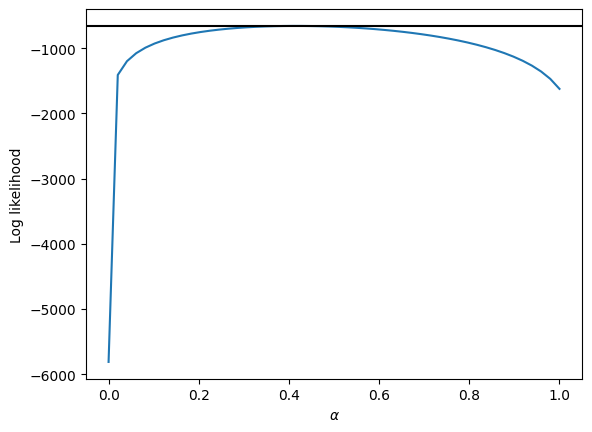

In [275]:
plt.plot(np.linspace(0,1), ll)
plt.axhline(np.max(ll), color='k')
plt.xlabel("$\\alpha$")
plt.ylabel("Log likelihood")

In [378]:
mu_a, sigma_a, mu_b, sigma_b

(4, 0.5, 3, 0.2)

In [143]:
from scipy.optimize import least_squares
x0 = [0,10,0,10]
result = least_squares(log_likelihood, x0, args=(these_samples, 0.4))

In [144]:
result.x

array([3.99588534, 0.47075336, 3.00117678, 0.18896155])

In [187]:
alpha_values = np.linspace(0,1)

parameter_estimates = []
for i, alpha in enumerate(alpha_values):
    samples = get_samples(alpha, num_samples = 1000)
    result = least_squares(log_likelihood, x0, args=(samples, alpha), ftol=1e-10)
    parameter_estimates.append(result.x)
    

parameter_estimates = np.array(parameter_estimates)

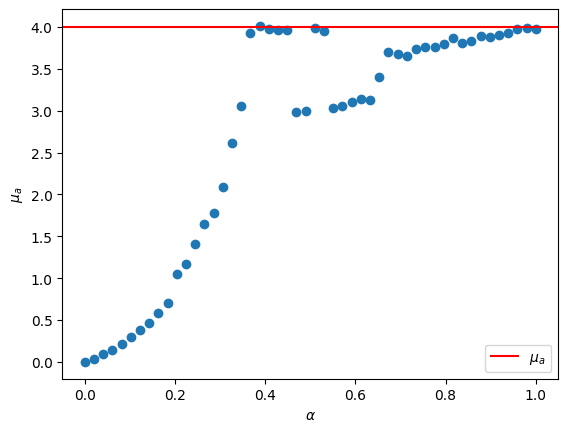

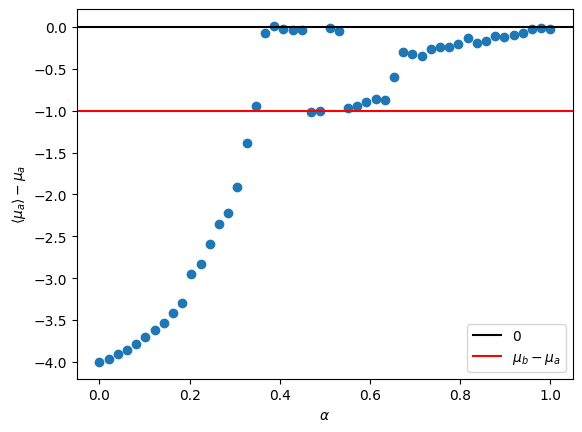

In [196]:
plt.plot(alpha_values, parameter_estimates[:,0], 'o')
plt.xlabel("$\\alpha$")
plt.ylabel("$\mu_a$")
plt.axhline(mu_a, color='r', label="$\\mu_a$" )
plt.legend()
plt.show()

plt.plot(alpha_values, parameter_estimates[:,0] - mu_a, 'o')
plt.xlabel("$\\alpha$")
plt.ylabel("$ \\langle \\mu_a \\rangle - \mu_a$")
plt.axhline(0, color='k', label=0)
plt.axhline(mu_b - mu_a, color='r', label="$\\mu_b - \\mu_a$" )
plt.legend()
plt.show()

In [224]:
def plot_mixture(params, alpha):
    x = np.linspace(-10, 10, 500)

    mu1, sigma1, mu2, sigma2 = params
    plt.plot(x, stats.norm.pdf(x, mu1, sigma1), label="Dist A", color='r')
    plt.plot(x, stats.norm.pdf(x, mu2, sigma2), label="Dist B", color='b')
    plt.plot(x, dista.pdf(x), color='r', alpha=0.3, label="True A dist")
    plt.plot(x, distb.pdf(x), color='b', alpha=0.3, label="True B dist")
    plt.title("Alpha = " + str(round(alpha,2)))
    plt.ylim(0,2)
    plt.legend()
    plt.show()
    # plt.plot(x, alpha *dista.pdf(x) + (1 - alpha) * distb.pdf(x), label=round(alpha, 2))

In [226]:
parameter_estimates[10], parameter_estimates[40]

(array([1.0467413 , 7.44027952, 3.02746429, 0.24441715]),
 array([3.86895272, 0.57426172, 0.85120849, 8.08156534]))

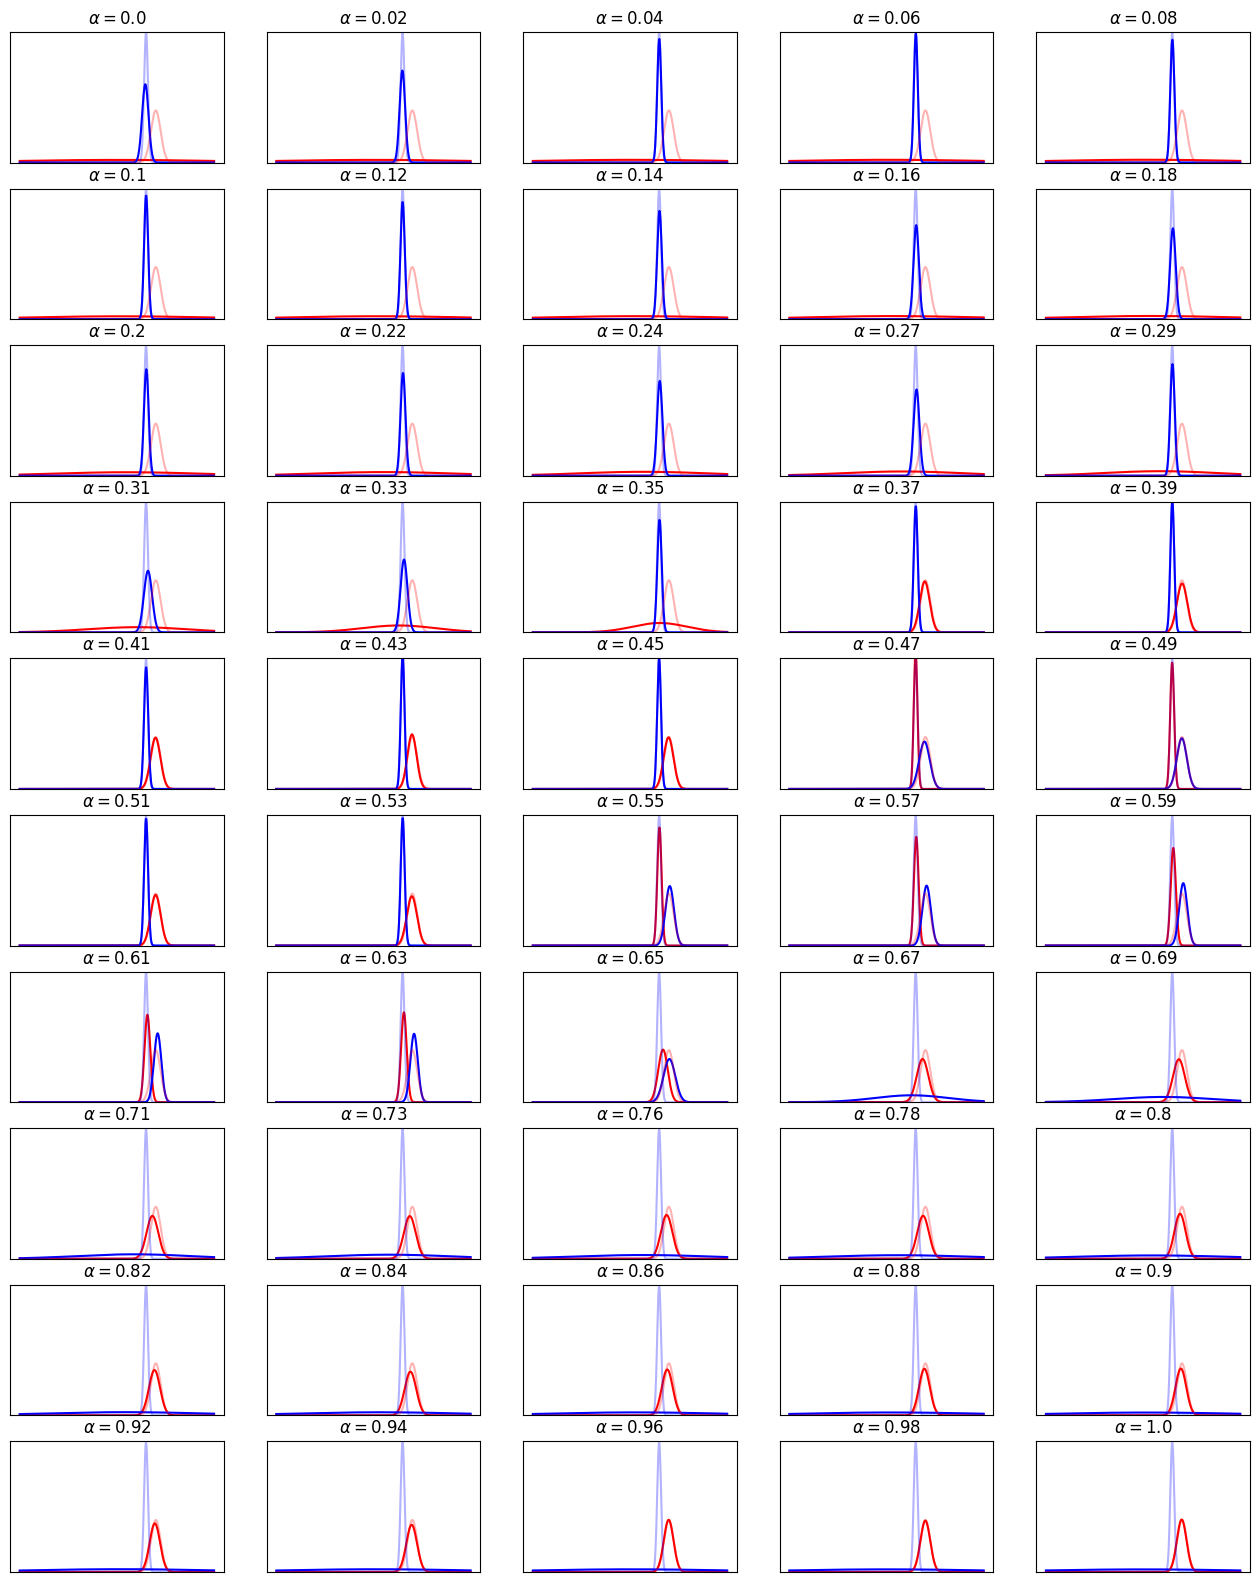

In [272]:
fig, ax = plt.subplots(10,5, figsize=(16,20), sharey='col')

for i in range(len(alpha_values)):
    b = i % 5
    a = int(np.floor(i / 5))
    x = np.linspace(-10, 10, 500)
    mu1, sigma1, mu2, sigma2 = parameter_estimates[i]
    ax[a][b].plot(x, stats.norm.pdf(x, mu1, sigma1), label="Dist A", color='r')
    ax[a][b].plot(x, stats.norm.pdf(x, mu2, sigma2), label="Dist B", color='b')
    ax[a][b].plot(x, dista.pdf(x), color='r', alpha=0.3, label="True A dist")
    ax[a][b].plot(x, distb.pdf(x), color='b', alpha=0.3, label="True B dist")
    ax[a][b].set_title("$\\alpha = $" + str(round(alpha_values[i],2)))
    ax[a][b].set_ylim(0,2)
    ax[a][b].set_xticks([])
    ax[a][b].set_yticks([])

    # ax[a][b].legend()

In [276]:
# plot_mixture(parameter_estimates[0], alpha_values[0])
# plot_mixture(parameter_estimates[10], alpha_values[10])
# plot_mixture(parameter_estimates[15], alpha_values[15])
# plot_mixture(parameter_estimates[25], alpha_values[25])
# plot_mixture(parameter_estimates[35], alpha_values[35])
# plot_mixture(parameter_estimates[40], alpha_values[40])
# plot_mixture(parameter_estimates[49], alpha_values[49])

Next steps: extend to more than 2 classes and also non-Gaussian distributions.

## 3 Components

In [281]:
def get_samples_3_ways(alpha1, alpha2, params, num_samples = 1000):
    samples = np.zeros(num_samples)

    mu1, sigma1, mu2, sigma2, mu3, sigma3 = params
    
    for i in range(num_samples):
        sample_alpha = rng.random()
        if sample_alpha < alpha1:
            samples[i] = rng.normal(mu1, sigma1)
        elif (sample_alpha < (alpha2 + alpha1)) and (sample_alpha > alpha1):
            samples[i] = rng.normal(mu2, sigma2)
        else:
            samples[i] = rng.normal(mu3, sigma3)
    return samples

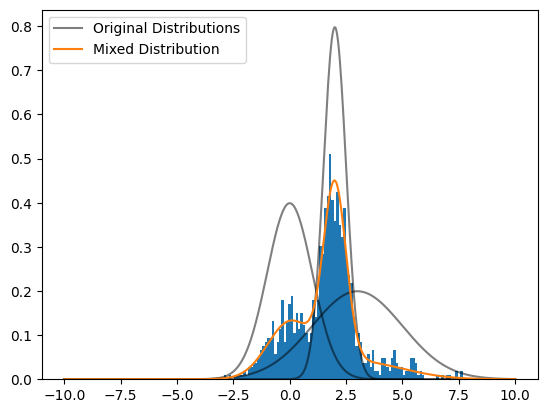

In [294]:
params = [0, 1, 2, 0.5, 3, 2]
alpha1 = 0.3
alpha2 = 0.5
x = np.linspace(-10, 10, 500)

samples_3_ways = get_samples_3_ways(alpha1, alpha2, params)

plt.hist(samples_3_ways, bins=100, density=True)
plt.plot(x, stats.norm(params[0], params[1]).pdf(x), color='k', label="Original Distributions", alpha=0.5)
plt.plot(x, stats.norm(params[2], params[3]).pdf(x), color='k', alpha=0.5)
plt.plot(x, stats.norm(params[4], params[5]).pdf(x), color='k', alpha=0.5)
plt.plot(x, alpha1 * stats.norm(params[0], params[1]).pdf(x) + alpha2 * stats.norm(params[2], params[3]).pdf(x) + 
         (1 - alpha1 - alpha2)* stats.norm(params[4], params[5]).pdf(x), label="Mixed Distribution")
plt.legend()
plt.show()
plt.show()

In [295]:
def log_likelihood_3_ways(x, samples, alpha1, alpha2):
    mu1, sigma1, mu2, sigma2, mu3, sigma3 = x
    first_term = alpha1 * stats.norm.pdf(samples, mu1, sigma1)
    second_term = alpha2 * stats.norm.pdf(samples, mu2, sigma2)
    third_term = (1 - alpha1 - alpha2) * stats.norm.pdf(samples, mu3, sigma3)

    return np.sum(np.log(first_term + second_term + third_term))

In [296]:
x0_3_ways = [0,10,0,10,0,10]

result = least_squares(log_likelihood_3_ways, x0_3_ways, args=(samples_3_ways, 0.3, 0.5))

In [299]:
result.x

array([-0.09174009,  0.93832553,  1.9991907 ,  0.50041604,  3.19381999,
        1.81725464])

In [332]:
alpha1_values = np.linspace(0,0.5,10)
alpha2_values = np.linspace(0,0.5,10)

parameter_estimates_3_ways = np.zeros((len(alpha1_values), len(alpha2_values), len(x0_3_ways)))
for i, alpha1 in enumerate(alpha1_values):
    for j, alpha2 in enumerate(alpha2_values):
        samples = get_samples_3_ways(alpha1, alpha2, params)
        result = least_squares(log_likelihood_3_ways, x0_3_ways, args=(samples, alpha1, alpha2), ftol=1e-10)
        parameter_estimates_3_ways[i,j,:] = result.x

/var/folders/0r/_1bnthz146q2xj0c42f4nl_80000gq/T/ipykernel_57006/1982430466.py:7: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(first_term + second_term + third_term))


In [333]:
parameter_estimates_3_ways.shape

(10, 10, 6)

In [334]:
true_params = [0, 1, 2, 0.5, 3, 2]

def plot_mixture_3_ways(params, alpha1, alpha2):
    x = np.linspace(-10, 10, 500)

    
    plt.plot(x, stats.norm(true_params[0], true_params[1]).pdf(x), color='r', alpha=0.5, linestyle='dashed')
    plt.plot(x, stats.norm(true_params[2], true_params[3]).pdf(x), color='b', alpha=0.5, linestyle='dashed')
    plt.plot(x, stats.norm(true_params[4], true_params[5]).pdf(x), color='g', alpha=0.5, linestyle='dashed')
    
    
    plt.plot(x, stats.norm(params[0], params[1]).pdf(x), color='r')
    plt.plot(x, stats.norm(params[2], params[3]).pdf(x), color='b')
    plt.plot(x, stats.norm(params[4], params[5]).pdf(x), color='g')
    # plt.plot(x, alpha1 * stats.norm(params[0], params[1]).pdf(x) + alpha2 * stats.norm(params[2], params[3]).pdf(x) + 
    #          (1 - alpha1 - alpha2)* stats.norm(params[4], params[5]).pdf(x), label="Mixed Distribution")
    plt.legend()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


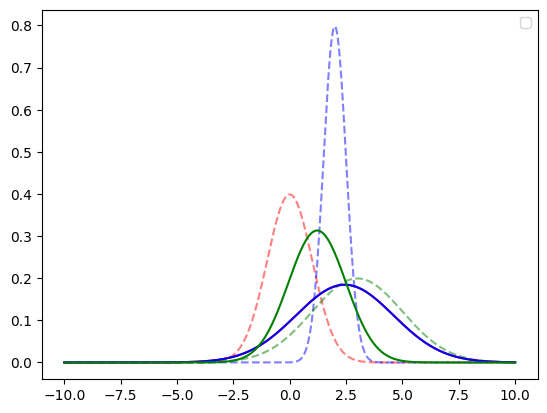

0.2777777777777778 0.2777777777777778


In [335]:
plot_mixture_3_ways(parameter_estimates[5,5,:], alpha1_values[5], alpha2_values[5])
print(alpha1_values[5], alpha2_values[5])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


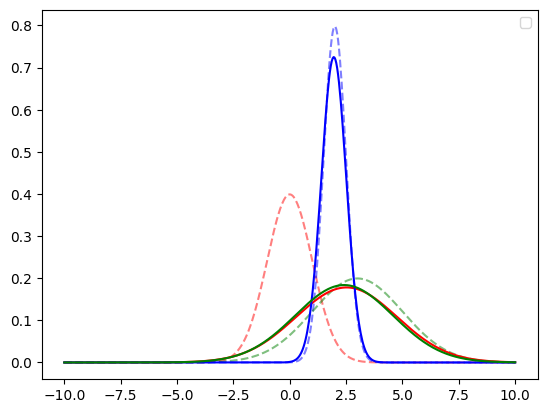

In [337]:
plot_mixture_3_ways(parameter_estimates[2,9,:], alpha1_values[2], alpha2_values[9])


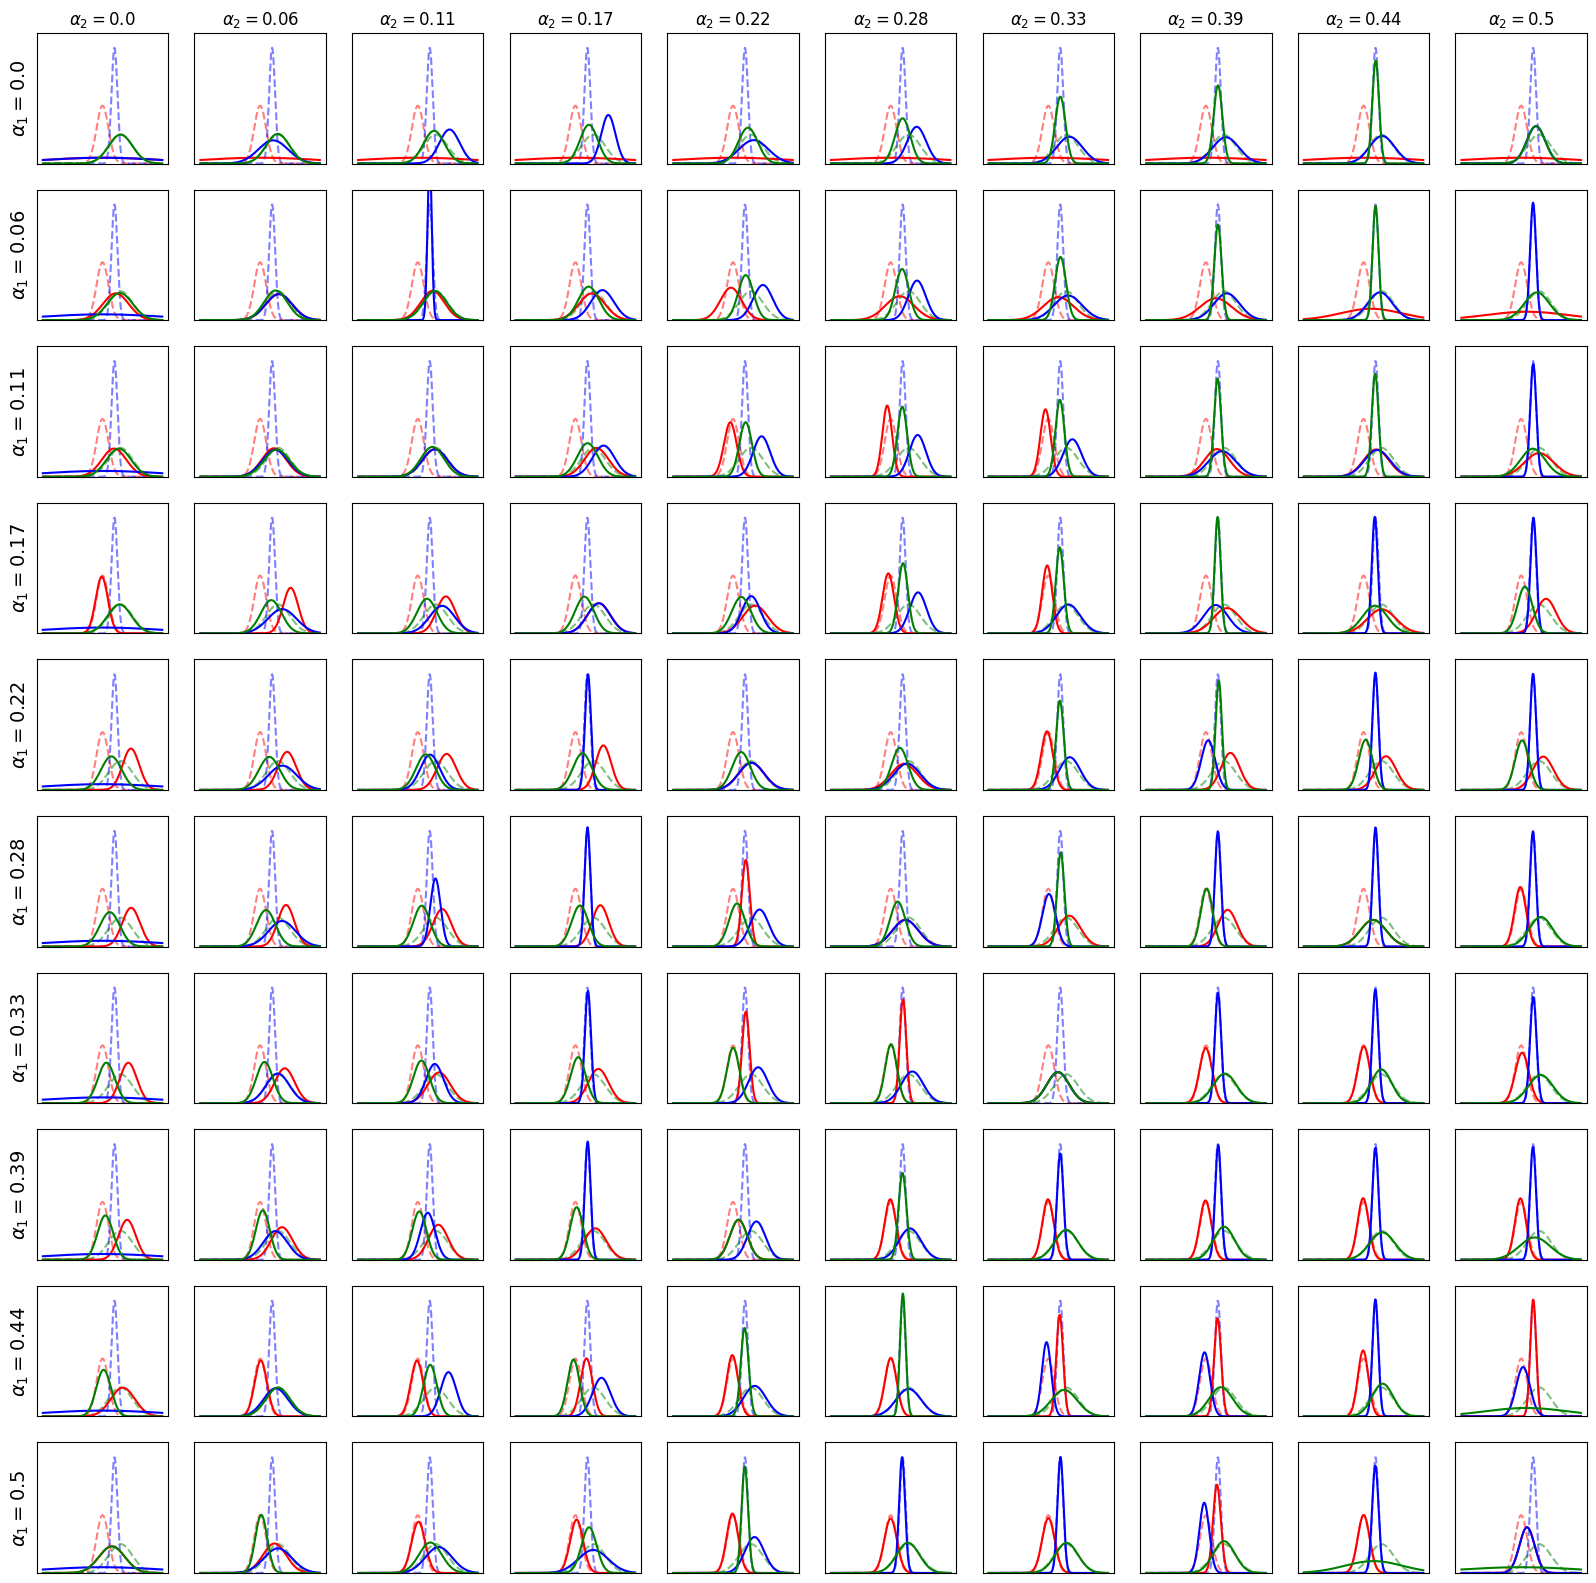

In [351]:
fig, ax = plt.subplots(10,10, figsize=(20,20), sharey='col')

x = np.linspace(-10, 10, 500)

for i in range(len(alpha1_values)):
    for j in range(len(alpha2_values)):
        params = parameter_estimates_3_ways[i, j, :]
        ax[i][j].plot(x, stats.norm(true_params[0], true_params[1]).pdf(x), color='r', alpha=0.5, linestyle='dashed')
        ax[i][j].plot(x, stats.norm(true_params[2], true_params[3]).pdf(x), color='b', alpha=0.5, linestyle='dashed')
        ax[i][j].plot(x, stats.norm(true_params[4], true_params[5]).pdf(x), color='g', alpha=0.5, linestyle='dashed')

        ax[i][j].plot(x, stats.norm(params[0], params[1]).pdf(x), color='r')
        ax[i][j].plot(x, stats.norm(params[2], params[3]).pdf(x), color='b')
        ax[i][j].plot(x, stats.norm(params[4], params[5]).pdf(x), color='g')
        ax[0][j].set_title("$\\alpha_2 = $" + str(round(alpha2_values[j],2)))
        ax[i][0].set_ylabel("$\\alpha_1 = $" + str(round(alpha1_values[i],2)), fontsize=14)
        ax[i][j].set_ylim(0,0.9)
        ax[i][j].set_xticks([])
        ax[i][j].set_yticks([])

In [352]:
fig.savefig("3way_gmm.pdf", bbox_inches='tight')

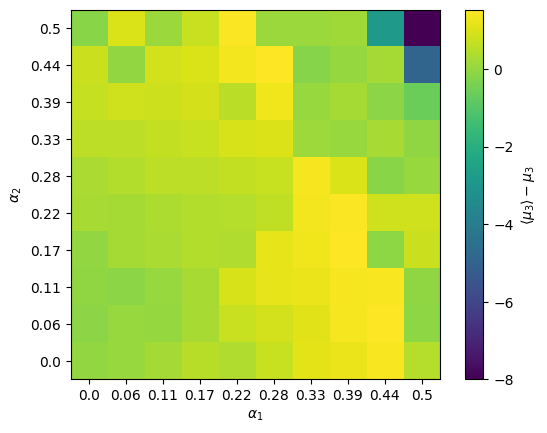

In [376]:
plt.imshow(true_params[5] - parameter_estimates_3_ways[:,:,5])
plt.xlabel("$\\alpha_1$")
plt.ylabel("$\\alpha_2$")
plt.xticks(ticks=np.arange(10), labels=np.round(alpha1_values,2))
plt.yticks(ticks=np.arange(10), labels=np.round(alpha2_values,2))

plt.gca().invert_yaxis()
cbar = plt.colorbar()
cbar.set_label("$\\langle \\mu_3 \\rangle - \\mu_3$")